## Kaggle Project - Bike Sharing Demand 

- Source: https://www.kaggle.com/c/bike-sharing-demand

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

### Dataset
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

#### Evaluation metrics
$$
\sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }
$$

- n  is the number of hours in the test set
- p<sub>i</sub> is your predicted count
- a<sub>i</sub> is the actual count
- log(x) is the natural logarithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Tip ★★★ : csv 파일을 읽어올 때 "parse_dates" 인자를 설정해주면 "날짜 정보"로 읽어옴(시간, 월, 연도를 뽑을 때 좀 더 수월해짐)

train_df = pd.read_csv('data/train.csv', parse_dates = ['datetime'])
test_df = pd.read_csv('data/test.csv', parse_dates = ['datetime'])

In [3]:
all_df = pd.concat((train_df, test_df), axis = 0).reset_index()
all_df.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [4]:
all_df.tail()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17374,6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN
17378,6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN


In [5]:
# all_df를 만들 때 concat 순서를 train, test로 해줬으므로 순서대로 index 설정해주기

train_index = list(range(len(train_df)))
test_index = list(range(len(train_df), len(all_df)))

In [6]:
all_df.isnull().sum()

index            0
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

#### Evaluation metrics
$$
\sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i + 1))^2}
$$

##### log 안에 있는 (p<sub>i</sub> + 1)과 (a<sub>i</sub> + 1)는 0보다 커야하므로 이를 처리해줄 수 있는 np.nan_to_num 사용
- nan 값을 0에 가까운 아주 작은 수로 변환시켜주므로 nan 값이 안 나오게 됨

In [7]:
x = np.array([np.inf, -np.inf, np.nan, -128, 128])
np.nan_to_num(x)

array([ 1.79769313e+308, -1.79769313e+308,  0.00000000e+000,
       -1.28000000e+002,  1.28000000e+002])

In [8]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.log(y + 1))
    log2 = np.nan_to_num(np.log(y_ + 1))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

#### 평가지표 확인

In [9]:
submission_df = pd.read_csv('data/sampleSubmission.csv')
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [10]:
rmsle(submission_df['count'].values, np.random.randint(0, 100, size = len(submission_df)))

3.758531083956805

In [11]:
del all_df['casual']
del all_df['registered']
del all_df['index']

##### Category 데이터인 'season'과 'weather'을 pd.get_dummies를 사용하여 One-hot Encoding으로 변환

In [12]:
pre_df = all_df.merge(pd.get_dummies(all_df['season'], prefix = 'season'), left_index = True, right_index = True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0


In [13]:
pre_df = pre_df.merge(pd.get_dummies(all_df['weather'], prefix = 'weather'), left_index = True, right_index = True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0,1,0,0,0


#### 'datetime'을 분리

In [14]:
pre_df['datetime'].unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-31T21:00:00.000000000', '2012-12-31T22:00:00.000000000',
       '2012-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [15]:
pre_df['year'] = pre_df['datetime'].dt.year
pre_df['month'] = pre_df['datetime'].dt.month
pre_df['day'] = pre_df['datetime'].dt.day
pre_df['hour'] = pre_df['datetime'].dt.hour
pre_df['weekday'] = pre_df['datetime'].dt.weekday
pre_df['weekday'].unique()    # weekday도 category 데이터인 것 확인

array([5, 6, 0, 1, 2, 3, 4])

In [16]:
pre_df['year'].unique(), pre_df['month'].unique(), pre_df['day'].unique(), pre_df['hour'].unique()

(array([2011, 2012]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]))

In [17]:
pre_df = pre_df.merge(pd.get_dummies(pre_df['weekday'], prefix = 'weekday'), left_index = True, right_index = True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,...,1,0,5,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,...,1,1,5,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,...,1,2,5,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,...,1,3,5,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,...,1,4,5,0,0,0,0,0,1,0


In [18]:
pre_df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1               uint8
season_2               uint8
season_3               uint8
season_4               uint8
weather_1              uint8
weather_2              uint8
weather_3              uint8
weather_4              uint8
year                   int64
month                  int64
day                    int64
hour                   int64
weekday                int64
weekday_0              uint8
weekday_1              uint8
weekday_2              uint8
weekday_3              uint8
weekday_4              uint8
weekday_5              uint8
weekday_6              uint8
dtype: object

In [19]:
category_variable_list = ["season", "weather", "workingday", "season_1", "season_2", "season_3", "season_4", "weather_1", "weather_2", "weather_3", "weather_4", "year", "month", "day", "hour", "weekday", "weekday_0", "weekday_1", "weekday_2", "weekday_3", "weekday_4", "weekday_5", "weekday_6"]
for var_name in category_variable_list:
    pre_df[var_name] = pre_df[var_name].astype('category')    # category 타입으로 변경

In [20]:
pre_df.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [21]:
train_df = pre_df.iloc[train_index]

#### y값인 count와 각 변수 간의 관계를 나타내보기

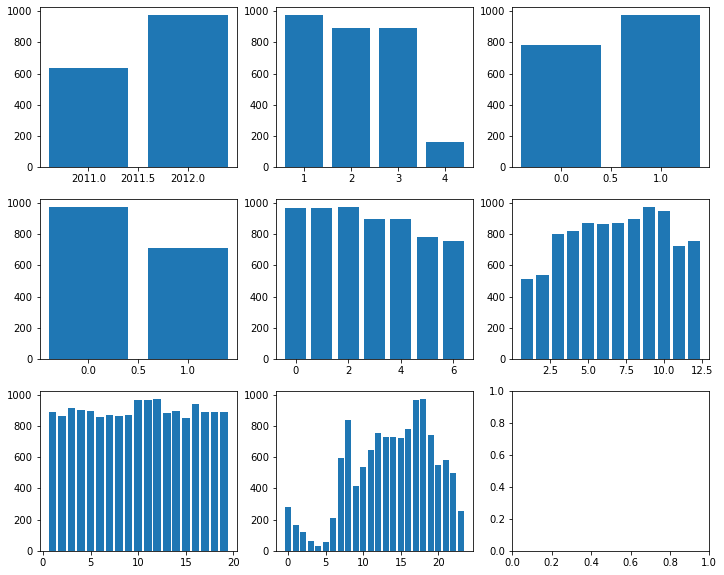

In [26]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)
fig.set_size_inches(12, 10)
axes[0][0].bar(train_df['year'], train_df['count'])
axes[0][1].bar(train_df['weather'], train_df['count'])
axes[0][2].bar(train_df['workingday'], train_df['count'])
axes[1][0].bar(train_df['holiday'], train_df['count'])
axes[1][1].bar(train_df['weekday'], train_df['count'])
axes[1][2].bar(train_df['month'], train_df['count'])
axes[2][0].bar(train_df['day'], train_df['count'])
axes[2][1].bar(train_df['hour'], train_df['count'])
plt.show()

#### 월별 평균값 보기(시간별, 연도별, 계절별 등 다양하게 가능)

In [24]:
series_data = train_df.groupby(['month'])['count'].mean()
series_data.index.tolist()[:5]

[1, 2, 3, 4, 5]

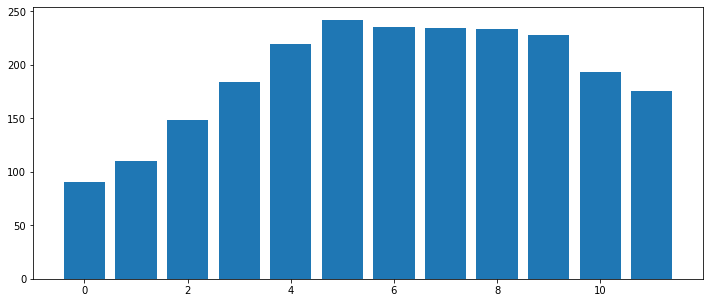

In [25]:
fig, ax = plt.subplots()
ax.bar(range(len(series_data)), series_data)
fig.set_size_inches(12, 5)
plt.show()

#### continuous data의 분포도 살펴보기

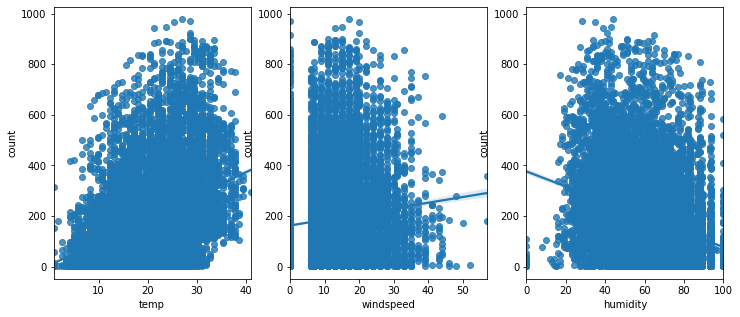

In [27]:
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3)
fig.set_size_inches(12, 5)
sns.regplot(x = 'temp', y = 'count', data = train_df, ax = ax1)
sns.regplot(x = 'windspeed', y = 'count', data = train_df, ax = ax2)
sns.regplot(x = 'humidity', y = 'count', data = train_df, ax = ax3)
plt.show()

In [28]:
category_variable_list

['season',
 'weather',
 'workingday',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'year',
 'month',
 'day',
 'hour',
 'weekday',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

#### 데이터 간의 상관관계
- 데이터 간 상관관계가 거의 1에 가까운(ex. temp와 atemp의 상관관계 0.98) 건 빼주는 게 좋음

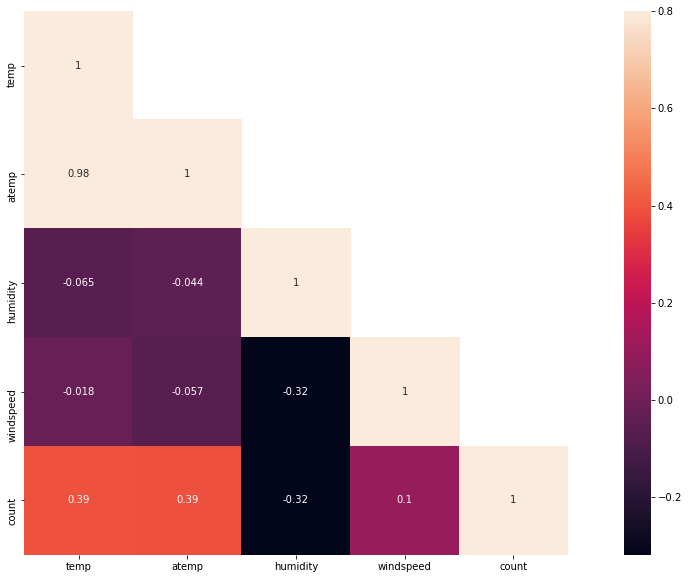

In [39]:
corrMatt = train_df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False     # triangle_lower : 아래쪽 삼각형으로
# mask[np.triu_indices_from(mask)] = False   # triangle_upper : 위쪽 삼각형으로

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask = mask, vmax = .8, square = True, annot = True)    # annot : 실제값 화면에 나타내기
plt.show()

In [31]:
mask

array([[ 0.        ,  0.98494811, -0.06494877, -0.01785201,  0.39445364],
       [ 0.        ,  0.        , -0.04353571, -0.057473  ,  0.38978444],
       [ 0.        ,  0.        ,  0.        , -0.31860699, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

### 변수들 간 가능한 여러 조합들 생성

In [40]:
category_variable_list[:5]

['season', 'weather', 'workingday', 'season_1', 'season_2']

In [41]:
continuous_variable_list = ["temp", "humidity", "windspeed", "atemp"]
season_list = ['season_1', 'season_2', 'season_3', 'season_4']
weather_list = ['weather_1', 'weather_2', 'weather_3', 'weather_4']
weekday_list = ['weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']
category_varialbe_list = ["season", "holiday", "workingday", "weather", "weekday", "month", "year", "hour"]

In [42]:
all_variable_list = continuous_variable_list + category_varialbe_list
all_variable_list.append(season_list)
all_variable_list.append(weather_list)
all_variable_list.append(weekday_list)
all_variable_list

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [43]:
number_of_variables = len(all_variable_list)
number_of_variables

15

##### 일반적으론 이런 방식보다 RFE(Recursive Feature Elimination)이나 FS(Feature Selection)기법들을 사용

In [44]:
variable_combinations = []

import itertools
for L in range(8, number_of_variables + 1):   # 최소 8개 ~ 최대 number_of_variables
    for subset in itertools.combinations(all_variable_list, L):
        temp = []
        for variable in subset:
            if isinstance(variable, list):    # "variable이 list 자료형인가"에 대한 boolean값 반환
                for value in variable:
                    temp.append(value)
            else:
                temp.append(variable)
        variable_combinations.append(temp)

In [45]:
variable_combinations[0], variable_combinations[1]

(['temp',
  'humidity',
  'windspeed',
  'atemp',
  'season',
  'holiday',
  'workingday',
  'weather'],
 ['temp',
  'humidity',
  'windspeed',
  'atemp',
  'season',
  'holiday',
  'workingday',
  'weekday'])

In [46]:
len(variable_combinations)   # 총 경우의 수

16384

In [49]:
del pre_df['count']

#### LinearRegression, Ridge, Lasso로 모델 비교

In [52]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import datetime
import warnings
warnings.filterwarnings("ignore")

kf = KFold(n_splits = 10)

y = train_df['count'].values
final_output = []
models = []

print(len(variable_combinations))
# ts = datetime.datetime.now()

for i, combination in enumerate(variable_combinations):
    print('Process : {} | Total : {}'.format(i+1, len(variable_combinations)), end='\r')
    lr = LinearRegression(n_jobs = 8)
    ridge = Ridge()
    lasso = Lasso()
    
    lr_result = []
    ridge_result = []
    lasso_result = []
    
    target_df = pre_df[combination]
    ALL = target_df.values
    std = StandardScaler()
    std.fit(ALL)
    ALL_scaled = std.transform(ALL)
    X = ALL_scaled[train_index]
    
    for train_data_index, test_data_index in kf.split(X):
        X_train = X[train_data_index]
        X_test = X[test_data_index]
        y_train = y[train_data_index]
        y_test = y[test_data_index]
        
        lr.fit(X_train, y_train)
        result = rmsle(y_test, lr.predict(X_test))
        lr_result.append(result)
        
        ridge.fit(X_train, y_train)
        result = rmsle(y_test, ridge.predict(X_test))
        ridge_result.append(result)
        
        lasso.fit(X_train, y_train)
        result = rmsle(y_test, lasso.predict(X_test))
        lasso_result.append(result)
        
    final_output.append([i, np.mean(lr_result), np.mean(ridge_result), np.mean(lasso_result)])
    models.append([lr, ridge, lasso])
    
#     if i % 100 == 0:
#         tf = datetime.datetime.now()
#         te = tf - ts
#         print(i, te)
#         ts = datetime.datetime.now()

16384


In [53]:
labels = ['combination', 'lr', 'ridge', 'lasso']
result_df = pd.DataFrame(final_output, columns = labels)
result_df.head()

,combination,lr,ridge,lasso
0,0,1.453390,1.452092,1.439138
1,1,1.457821,1.456870,1.441897
2,2,1.465858,1.465260,1.455254
3,3,1.423371,1.423143,1.417983
4,4,1.306359,1.304990,1.288698


In [54]:
result_df.min()   # lasso의 rmsle가 가장 낮은 것 확인

combination    0.000000
lr             1.258119
ridge          1.258814
lasso          1.254718
dtype: float64

In [55]:
result_df['lasso'].sort_values().head()

4752     1.254718
4641     1.254737
10458    1.254737
4696     1.254737
4661     1.254758
Name: lasso, dtype: float64

In [56]:
variable_combinations[4752]

['humidity',
 'atemp',
 'workingday',
 'weather',
 'weekday',
 'hour',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [57]:
target_df = pre_df[variable_combinations[4752]]
ALL = target_df.values
std = StandardScaler()
std.fit(ALL)
ALL_scaled = std.transform(ALL)
X_submission_test = ALL_scaled[test_index]
X_submission_test.shape

(6493, 17)

In [58]:
X_submission_test

array([[-0.34847267, -1.44592342,  0.68170976, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-0.34847267, -1.18173227,  0.68170976, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-0.34847267, -1.18173227,  0.68170976, ..., -0.40865929,
        -0.41105331, -0.41009641],
       ...,
       [-0.14113744, -1.26960201,  0.68170976, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-0.34847267, -1.18173227,  0.68170976, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [ 0.11803159, -1.18173227,  0.68170976, ..., -0.40865929,
        -0.41105331, -0.41009641]])

In [59]:
models[4752][2]

Lasso()

In [62]:
final_result = models[4752][2].predict(X_submission_test)
final_result[final_result < 0] = 0
final_result

array([ 13.872059  ,  38.74604771,  46.13213347, ..., 169.7221112 ,
       190.73140758, 180.55230694])

In [63]:
pre_df.iloc[test_index]['datetime'].head()

10886   2011-01-20 00:00:00
10887   2011-01-20 01:00:00
10888   2011-01-20 02:00:00
10889   2011-01-20 03:00:00
10890   2011-01-20 04:00:00
Name: datetime, dtype: datetime64[ns]

In [64]:
data = {'datetime' : pre_df.iloc[test_index]['datetime'], 'count' : final_result}
df_submission = pd.DataFrame(data, columns = ['datetime', 'count'])
df_submission.head()

,datetime,count
10886,2011-01-20 00:00:00,13.872059
10887,2011-01-20 01:00:00,38.746048
10888,2011-01-20 02:00:00,46.132133
10889,2011-01-20 03:00:00,47.701758
10890,2011-01-20 04:00:00,55.087844


In [65]:
df_submission.set_index('datetime').to_csv("submission_lasso_data.csv")